In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
car=pd.read_excel("new dataset.xlsx")
car.head(2)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848


In [3]:
car.shape

(53943, 11)

In [4]:
car.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [6]:
car.duplicated().sum()

64

In [7]:
car.drop_duplicates(inplace=True)

In [8]:
car.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [9]:
car["Primary Factor"].unique()

array(['OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'FOLLOWING TOO CLOSELY',
       'DISREGARD SIGNAL/REG SIGN', 'FAILURE TO YIELD RIGHT OF WAY',
       'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE',
       'ENGINE FAILURE OR DEFECTIVE', 'RAN OFF ROAD RIGHT',
       'UNSAFE BACKING', 'ROADWAY SURFACE CONDITION', nan,
       'SPEED TOO FAST FOR WEATHER CONDITIONS',
       'ANIMAL/OBJECT IN ROADWAY', 'PEDESTRIAN ACTION',
       'IMPROPER TURNING', 'UNSAFE LANE MOVEMENT', 'LEFT OF CENTER',
       'IMPROPER LANE USAGE', 'OVERCORRECTING/OVERSTEERING',
       'BRAKE FAILURE OR DEFECTIVE', 'UNSAFE SPEED',
       'DRIVER ASLEEP OR FATIGUED', 'VIEW OBSTRUCTED', 'DRIVER ILLNESS',
       'IMPROPER PASSING', 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE',
       'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR', 'WRONG WAY ON ONE WAY',
       'ACCELERATOR FAILURE OR DEFECTIVE', 'INSECURE/LEAKY LOAD',
       'CELL PHONE USAGE', 'TIRE FAILURE OR DEFECTIVE',
       'OTHER TELEMATICS IN USE', 'HEADLIGHT DEFECTIVE OR NOT O

In [10]:
car["Primary Factor"].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11186
FOLLOWING TOO CLOSELY                        7350
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6152
UNSAFE BACKING                               5183
RAN OFF ROAD RIGHT                           2922
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1911
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1684
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1498
ROADWAY SURFACE CONDITION                    1259
LEFT OF CENTER                               1077
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           804
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              495
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472
OTHER (ENVIRONMENTAL) - EXPLAIN IN 

In [11]:
car["Weekend?"].value_counts()

Weekend?
Weekday    40557
Weekend    13254
Name: count, dtype: int64

In [12]:
car1=car.copy()





### Treating null values

In [13]:
car["Weekend?"].fillna(car["Weekend?"].mode()[0],inplace=True)

In [14]:
car.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?                0
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [15]:
car["Primary Factor"].fillna(car["Primary Factor"].mode()[0],inplace=True)

In [16]:
car["Hour"].fillna(car["Hour"].mean(),inplace=True)

In [17]:
car["Collision Type"].value_counts()

Collision Type
2-Car               37565
1-Car               10225
3+ Cars              3150
Moped/Motorcycle     1007
Bus                   849
Pedestrian            609
Cyclist               468
Name: count, dtype: int64

In [18]:
car.dropna(inplace=True)

In [19]:
car.shape

(53808, 11)

In [20]:
car1=car.copy()

- latitude and longitude is showing high -ve correlation to each other

In [22]:
car.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,53808.0,NaN,NaN,NaN,2008.966566,3.787507,2003.0,2006.0,2009.0,2012.0,2015.0
Month,53808.0,NaN,NaN,NaN,6.660887,3.514729,1.0,4.0,7.0,10.0,12.0
Day,53808.0,NaN,NaN,NaN,4.197201,1.909393,1.0,3.0,4.0,6.0,7.0
Weekend?,53808,2,Weekday,40569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,53808.0,NaN,NaN,NaN,1347.459763,530.439248,0.0,1000.0,1400.0,1700.0,2300.0
Collision Type,53808,7,2-Car,37508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Injury Type,53808,4,No injury/unknown,41485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Factor,53808,55,FAILURE TO YIELD RIGHT OF WAY,12286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reported_Location,53808,19355,E 3RD ST,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,53808.0,NaN,NaN,NaN,35.602035,11.261566,0.0,39.142048,39.164436,39.173344,41.228665


- from the above table its almost clear that the chances for outliers are less
- more number of accidents must have occured in the year 2012
- more number of accidents occured month will be october
- weekdays are having most number of crashes
- collision type is having more numbers with a crash of two cars
- primary factor is the failure to yield the right way


In [23]:
car.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


<Axes: xlabel='Weekend?', ylabel='count'>

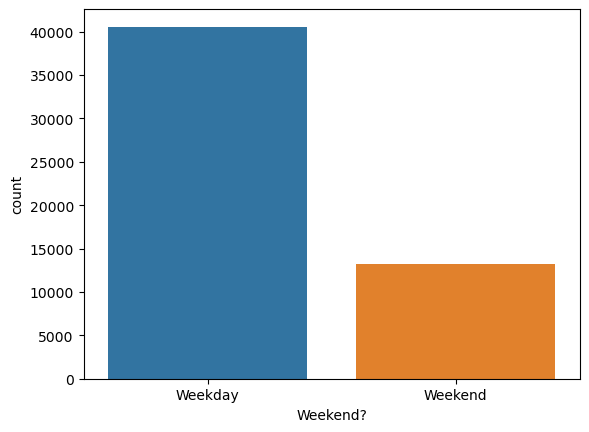

In [24]:
sns.countplot(data=car,x="Weekend?")

- weekdays are more prone to accidents
- the reason increased traffic volume,rush hour fatigue,distractions,more complex driving conditions
- weekend accidents are not less 
- the reasons may be speeding and impaired driving,recreational activities,teenagers on the road,weather conditions

<Axes: xlabel='Month', ylabel='count'>

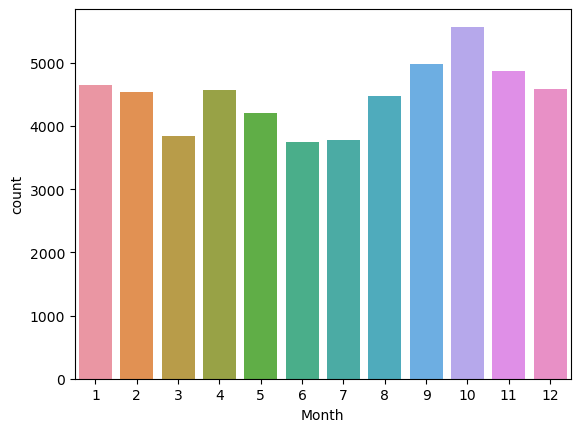

In [25]:
sns.countplot(data=car,x="Month")

- october saw the most number of accidents followed by september then november
- ther reasons may be Transition from summer to fall,Reduced daylight hours,Wet leaves and rain resulting in skidding 
- Holidays: October often sees holidays like Halloween and Thanksgiving, leading to more people traveling by car, which naturally increases the risk of accidents.
- 

<Axes: xlabel='Year', ylabel='count'>

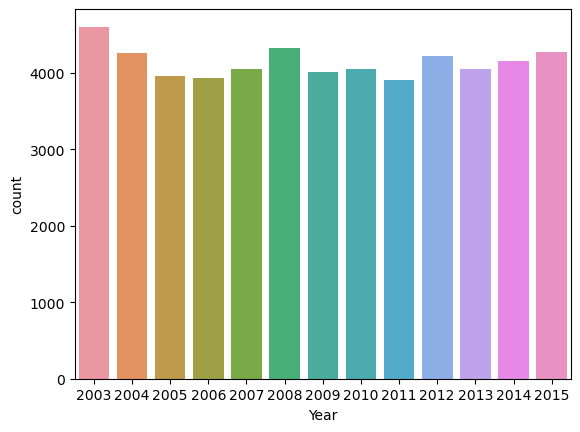

In [26]:
sns.countplot(data=car,x="Year")

- 2003 was a year recorded with more number of accidents followed by 2008 then 2015

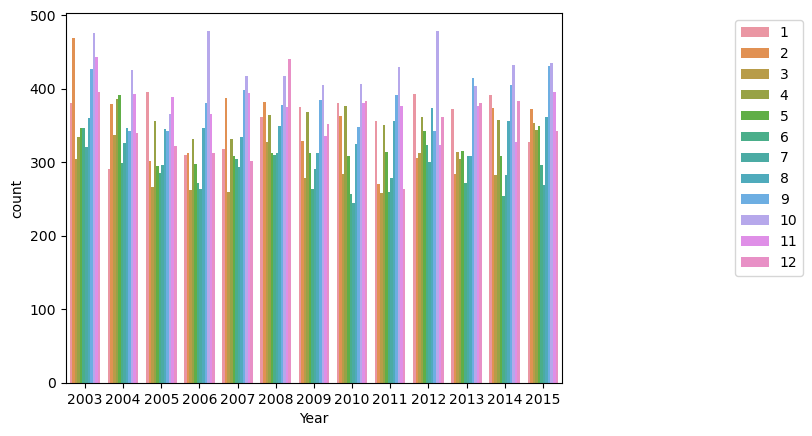

In [27]:
sns.countplot(data=car,x="Year",hue="Month")
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

- october got the highest accidents in the year 2003,2006 and 2012
- feb and oct were the highest accident months in 2003 
- the reasons of october have been given
-  Icy roads and weather conditions due to winter storms can significantly increase the risk of skidding and loss of control, leading to more accidents. Additionally, reduced daylight hours might contribute to lower visibility and hamper driver judgment.
- Major snowstorms or other weather events in February 2003 could have significantly impacted traffic flow and contributed to the higher accident rate. Additionally, local events like sporting events or holidays impacting travel during that time could be a factor

<Axes: xlabel='Collision Type', ylabel='count'>

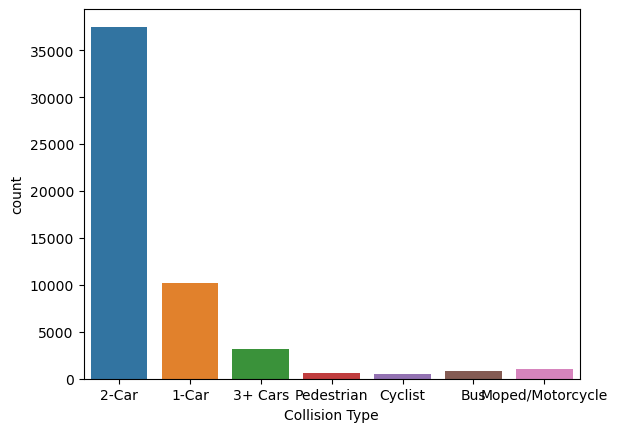

In [28]:
sns.countplot(data=car,x="Collision Type")


- 2 car collision contributed in a very big amount followed by 1 car then 3+ cars

<Axes: ylabel='count'>

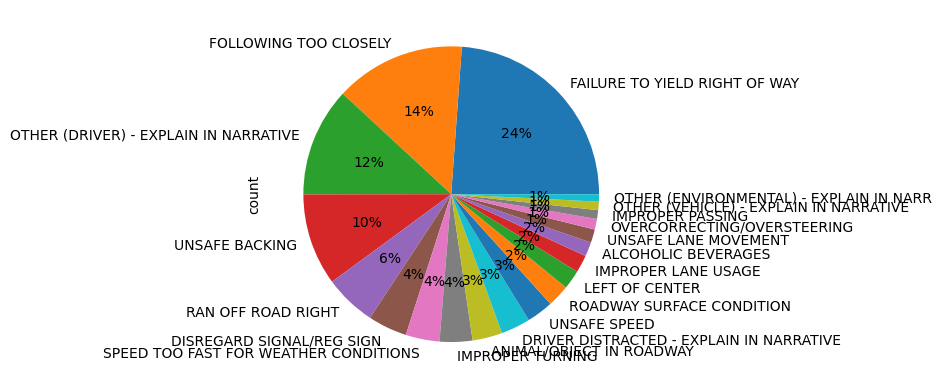

In [29]:
car["Primary Factor"].value_counts().head(20).plot(kind="pie",autopct = '%1.0f%%')


- 24% of crashes are due to the failure to yield right of way
- 14% is because of not keeping fair distance between vehicles which may end in rear end collisions or chain reactions
- 12% is because of other driver
- 10% because of unsafe backing



In [30]:
car.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


<Axes: xlabel='Reported_Location'>

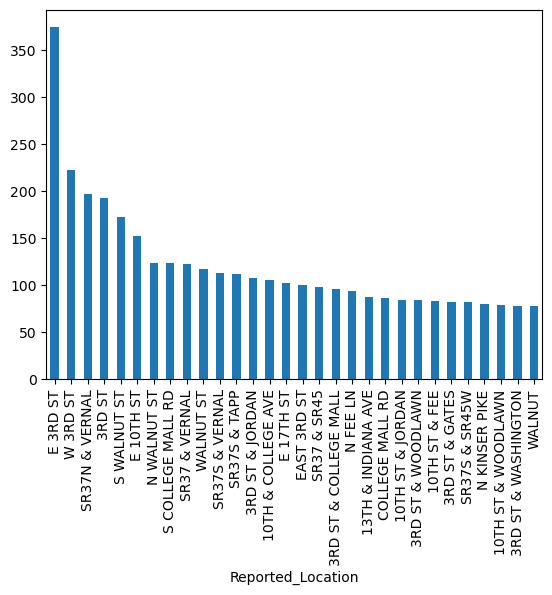

In [31]:
car["Reported_Location"].value_counts().head(30).plot(kind="bar")

- the most accident prone area we can tell as E 3rd ST and W 3rd ST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'FAILURE TO YIELD RIGHT OF WAY'),
  Text(1, 0, 'FOLLOWING TOO CLOSELY'),
  Text(2, 0, 'OTHER (DRIVER) - EXPLAIN IN NARRATIVE'),
  Text(3, 0, 'UNSAFE BACKING'),
  Text(4, 0, 'RAN OFF ROAD RIGHT'),
  Text(5, 0, 'DISREGARD SIGNAL/REG SIGN'),
  Text(6, 0, 'SPEED TOO FAST FOR WEATHER CONDITIONS'),
  Text(7, 0, 'IMPROPER TURNING'),
  Text(8, 0, 'ANIMAL/OBJECT IN ROADWAY'),
  Text(9, 0, 'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE'),
  Text(10, 0, 'UNSAFE SPEED'),
  Text(11, 0, 'ROADWAY SURFACE CONDITION'),
  Text(12, 0, 'LEFT OF CENTER'),
  Text(13, 0, 'IMPROPER LANE USAGE'),
  Text(14, 0, 'ALCOHOLIC BEVERAGES'),
  Text(15, 0, 'UNSAFE LANE MOVEMENT'),
  Text(16, 0, 'OVERCORRECTING/OVERSTEERING'),
  Text(17, 0, 'IMPROPER PASSING'),
  Text(18, 0, 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE'),
  Text(19, 0, 'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR'),
  Text(20, 0, 'BRAKE F

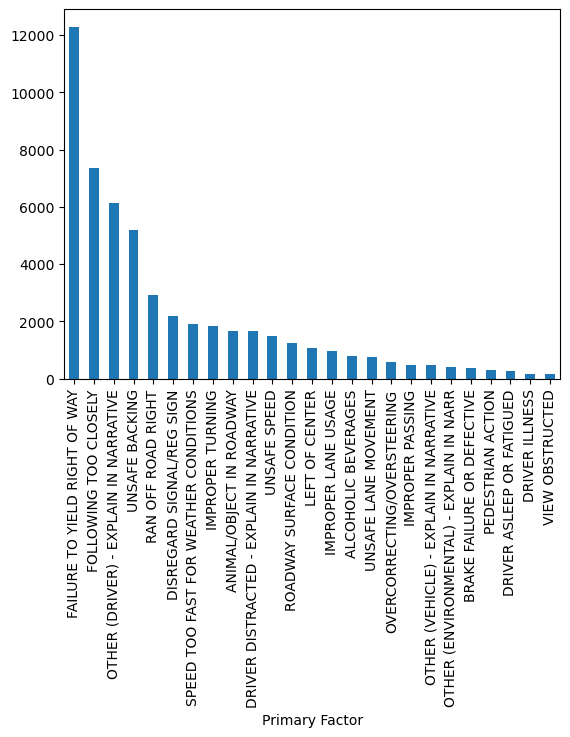

In [32]:
car["Primary Factor"].value_counts().head(25).plot(kind="bar")
plt.xticks(rotation=90)

In [33]:
car["Primary Factor"].value_counts(normalize=True)

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               0.228330
FOLLOWING TOO CLOSELY                       0.136467
OTHER (DRIVER) - EXPLAIN IN NARRATIVE       0.114054
UNSAFE BACKING                              0.096250
RAN OFF ROAD RIGHT                          0.054286
DISREGARD SIGNAL/REG SIGN                   0.040942
SPEED TOO FAST FOR WEATHER CONDITIONS       0.035478
IMPROPER TURNING                            0.034214
ANIMAL/OBJECT IN ROADWAY                    0.031278
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE    0.030739
UNSAFE SPEED                                0.027821
ROADWAY SURFACE CONDITION                   0.023398
LEFT OF CENTER                              0.019960
IMPROPER LANE USAGE                         0.018231
ALCOHOLIC BEVERAGES                         0.014942
UNSAFE LANE MOVEMENT                        0.013994
OVERCORRECTING/OVERSTEERING                 0.011095
IMPROPER PASSING                            0.009181
OTHER (VEHICLE) - EXPLAIN IN NA

In [34]:
car.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


<Axes: xlabel='Hour'>

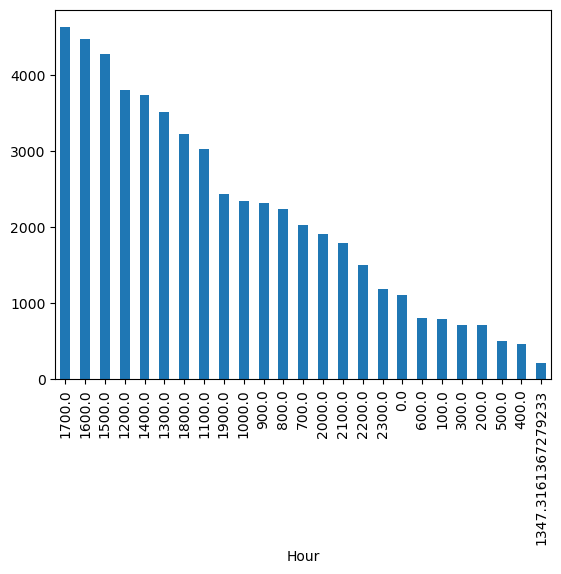

In [35]:
car["Hour"].value_counts().plot(kind="bar")

- 5pm was a time with more number of accidents followed by 4pm , 3pm , 12 pm
- mainly because of the rush hour traffic
- the driver can be tired by working all day
- according to the place there is chance of less day light during this time
- less car crashes are seen during midnight
- In some regions, 5 pm might mark the transition from afternoon sun to cooler evening temperatures. This can cause changes in road conditions, like condensation or dew formation, making roads slicker and increasing the risk of skidding accidents

<Axes: ylabel='count'>

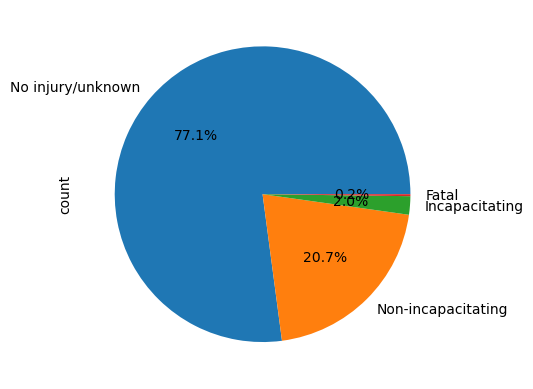

In [36]:
car["Injury Type"].value_counts().plot(kind="pie",autopct="%0.1f%%")

- 77% of car crashes are with no injury
- 20.7% non incapacitating which means small injuries that doesnot affect their daily activities
- 2% incapacitating which means their will be big injuries that limit your ability to complete with daily activities
- only 0.2% is fatal

In [37]:
fatal=car[car["Injury Type"]=="Fatal"]

In [38]:
fatal

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
530,2015,4,6,Weekday,1600.0,1-Car,Fatal,RAN OFF ROAD RIGHT,DUNCAN & W LEONARD SPRINGS,39.122352,-86.596400
531,2015,4,7,Weekend,1500.0,2-Car,Fatal,RAN OFF ROAD RIGHT,KIRBY & W ST RD 48,39.059185,-86.610820
649,2015,1,4,Weekday,1700.0,2-Car,Fatal,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,SR 45,39.125312,-86.610496
1334,2015,4,1,Weekend,700.0,1-Car,Fatal,RAN OFF ROAD RIGHT,INGRAM & SR37N,39.002892,-86.537282
1873,2015,6,3,Weekday,2200.0,Moped/Motorcycle,Fatal,RAN OFF ROAD RIGHT,SR37S & STATE ROAD 45,39.252134,-86.575043
...,...,...,...,...,...,...,...,...,...,...,...
53043,2003,6,5,Weekday,700.0,2-Car,Fatal,LEFT OF CENTER,FULLERTON PIKE & SR 37,39.122332,-86.569889
53289,2003,4,7,Weekend,0.0,Moped/Motorcycle,Fatal,ALCOHOLIC BEVERAGES,CLEVE BUTCHER & FAIRFAX,39.060039,-86.498433
53665,2003,10,6,Weekday,400.0,1-Car,Fatal,RAN OFF ROAD LEFT,CEDAR BLUFF & SR37,0.000000,0.000000
53681,2003,5,4,Weekday,1700.0,2-Car,Fatal,LEFT OF CENTER,BURGOON CHAPEL & SR446,0.000000,0.000000


In [39]:
fatal["Collision Type"].value_counts()

Collision Type
1-Car               49
2-Car               31
Moped/Motorcycle    21
Pedestrian           8
3+ Cars              5
Bus                  1
Name: count, dtype: int64

In [40]:
fatal[fatal["Collision Type"]=="1-Car"]["Primary Factor"].value_counts()

Primary Factor
RAN OFF ROAD RIGHT                       24
UNSAFE SPEED                              7
ALCOHOLIC BEVERAGES                       5
OTHER (DRIVER) - EXPLAIN IN NARRATIVE     3
RAN OFF ROAD LEFT                         3
PEDESTRIAN ACTION                         2
OBSTRUCTION NOT MARKED                    1
LEFT OF CENTER                            1
OVERCORRECTING/OVERSTEERING               1
ROADWAY SURFACE CONDITION                 1
DRIVER ASLEEP OR FATIGUED                 1
Name: count, dtype: int64

- ran off road right was more which caused fatal injuries in single car accident , The vehicle moving sideways and crossed the right edge of the road, potentially onto the shoulder, sidewalk, or into a ditch 
- loss of control
- the vehicle might have bumped into posts , fences or some obstacles


In [41]:
fatal[fatal["Collision Type"]=="2-Car"]["Primary Factor"].value_counts()

Primary Factor
LEFT OF CENTER                             13
FAILURE TO YIELD RIGHT OF WAY               4
DISREGARD SIGNAL/REG SIGN                   3
OTHER (DRIVER) - EXPLAIN IN NARRATIVE       2
OVERCORRECTING/OVERSTEERING                 2
UNSAFE SPEED                                2
RAN OFF ROAD RIGHT                          1
ACCELERATOR FAILURE OR DEFECTIVE            1
IMPROPER PASSING                            1
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR     1
SPEED TOO FAST FOR WEATHER CONDITIONS       1
Name: count, dtype: int64

- left of center came to be the main reason for fatal injuries in 2 car collision resulting in lane change and colliding car coming in opp direction
- Improper passing
- Turning or merging accidents


In [42]:
incap=car[car["Injury Type"]=="Incapacitating"]

In [43]:
incap

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
7,2015,1,6,Weekday,1400.0,1-Car,Incapacitating,ENGINE FAILURE OR DEFECTIVE,NORTH LOUDEN RD,39.199272,-86.637024
14,2015,1,1,Weekend,1300.0,3+ Cars,Incapacitating,DISREGARD SIGNAL/REG SIGN,ROGERS & W PATTERSON,39.153790,-86.538750
38,2015,1,7,Weekend,1800.0,Pedestrian,Incapacitating,PEDESTRIAN ACTION,COOLIDGE & ROCKPORT,39.141926,-86.543142
44,2015,1,4,Weekday,400.0,1-Car,Incapacitating,RAN OFF ROAD RIGHT,BREEDEN & SR45W,39.088157,-86.669012
60,2015,1,5,Weekday,1800.0,Cyclist,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,ATWATER & HIGH,39.163115,-86.508462
...,...,...,...,...,...,...,...,...,...,...,...
52995,2003,6,1,Weekend,1500.0,2-Car,Incapacitating,FAILURE TO YIELD RIGHT OF WAY,HEATHERWOOD & LEONARD SPRINGS RD,39.126976,-86.582464
52997,2003,4,4,Weekday,1400.0,2-Car,Incapacitating,FOLLOWING TOO CLOSELY,PINEWOOD & WALNUT ST,39.126717,-86.531399
53039,2003,8,2,Weekday,1400.0,2-Car,Incapacitating,FAILURE TO YIELD RIGHT OF WAY,FULLERTON & SR37,39.122352,-86.571200
53075,2003,1,5,Weekday,1700.0,2-Car,Incapacitating,FAILURE TO YIELD RIGHT OF WAY,DUNLAP & SR45,39.119344,-86.618896


In [44]:
incap["Collision Type"].value_counts()

Collision Type
2-Car               445
1-Car               204
Moped/Motorcycle    154
3+ Cars             116
Pedestrian          104
Cyclist              50
Bus                   9
Name: count, dtype: int64

In [45]:
incap[incap["Collision Type"]=="2-Car"]["Primary Factor"].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               163
FOLLOWING TOO CLOSELY                        73
DISREGARD SIGNAL/REG SIGN                    47
LEFT OF CENTER                               42
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        20
UNSAFE SPEED                                 15
IMPROPER TURNING                             13
DRIVER ILLNESS                                9
SPEED TOO FAST FOR WEATHER CONDITIONS         9
UNSAFE LANE MOVEMENT                          8
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE      8
IMPROPER PASSING                              5
ROADWAY SURFACE CONDITION                     5
DRIVER ASLEEP OR FATIGUED                     5
ALCOHOLIC BEVERAGES                           4
OVERCORRECTING/OVERSTEERING                   2
CELL PHONE USAGE                              2
BRAKE FAILURE OR DEFECTIVE                    2
UNSAFE BACKING                                2
WRONG WAY ON ONE WAY                          2
RAN OFF ROAD RIGHT       

- Increased accident risk: Not yielding right of way significantly increases the chances of colliding with another vehicle, especially in busy intersections or merging areas.
- Severity of crashes: Accidents involving failures to yield can be severe, particularly when speed and impact forces are significant.
- Traffic violation: Ignoring the right of way is a traffic violation and can result in fines, points on your license, or even court appearances if the accident was major.

In [46]:
incap["Primary Factor"].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               275
RAN OFF ROAD RIGHT                          129
FOLLOWING TOO CLOSELY                       127
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        75
DISREGARD SIGNAL/REG SIGN                    66
LEFT OF CENTER                               61
PEDESTRIAN ACTION                            46
UNSAFE SPEED                                 45
SPEED TOO FAST FOR WEATHER CONDITIONS        32
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     26
ALCOHOLIC BEVERAGES                          26
DRIVER ILLNESS                               25
IMPROPER TURNING                             24
OVERCORRECTING/OVERSTEERING                  17
ANIMAL/OBJECT IN ROADWAY                     17
ROADWAY SURFACE CONDITION                    16
UNSAFE LANE MOVEMENT                         11
IMPROPER PASSING                             10
UNSAFE BACKING                                8
DRIVER ASLEEP OR FATIGUED                     8
OTHER (VEHICLE) - EXPLAIN

In [47]:
incap[incap["Collision Type"]=="1-Car"]["Primary Factor"].value_counts()

Primary Factor
RAN OFF ROAD RIGHT                          106
SPEED TOO FAST FOR WEATHER CONDITIONS        15
DRIVER ILLNESS                               14
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        12
UNSAFE SPEED                                 12
OVERCORRECTING/OVERSTEERING                   9
ALCOHOLIC BEVERAGES                           6
ANIMAL/OBJECT IN ROADWAY                      6
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        3
DRIVER ASLEEP OR FATIGUED                     3
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE      3
ROADWAY SURFACE CONDITION                     2
OBSTRUCTION NOT MARKED                        2
IMPROPER LANE USAGE                           2
IMPROPER TURNING                              2
PRESCRIPTION DRUGS                            1
ENGINE FAILURE OR DEFECTIVE                   1
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR       1
LEFT OF CENTER                                1
BRAKE FAILURE OR DEFECTIVE                    1
DISREGARD SIGNAL/REG SIGN

In [48]:
! pip install geopandas matplotlib plotly folium

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/e3/23/00912e3236306ec52a06f95a08918cbb54f900419951726a20a8783a8507/geopandas-0.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 162.5 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 245.8 kB/s eta 0:00:01
     

In [49]:
import geopandas as gpd

In [50]:
geo_df = gpd.GeoDataFrame(
    incap, geometry=gpd.points_from_xy(incap.Longitude, incap.Latitude)
)

In [51]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

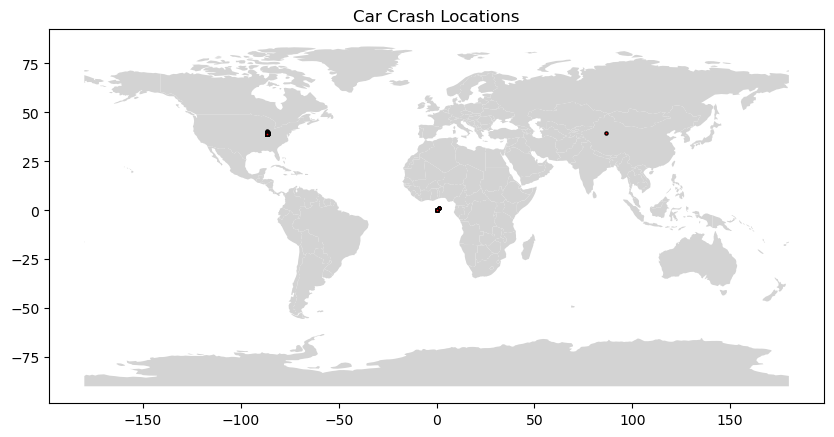

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgray")
geo_df.plot(ax=ax, markersize=5, color="red", edgecolor="black")
plt.title("Car Crash Locations")
plt.show()

In [56]:
from folium.plugins import HeatMap

In [57]:
!pip install geocoder
!pip install geopy

     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ------------------------------------- -- 92.2/98.6 kB 5.1 MB/s eta 0:00:01
     ---------------------------------------- 98.6/98.6 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.3 kB 217.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/40.3 kB 220.2 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 160.9 kB/s eta 0:00:00
   ---------------------------------------- 

In [58]:
from geopy.geocoders import Nominatim

In [59]:
geolocator=Nominatim(user_agent="app",timeout=None)

In [60]:
from folium.plugins import HeatMap

In [61]:
fatal1=fatal.copy()

In [62]:
fatal1["count"]="count"

In [63]:
fatal1

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,count
530,2015,4,6,Weekday,1600.0,1-Car,Fatal,RAN OFF ROAD RIGHT,DUNCAN & W LEONARD SPRINGS,39.122352,-86.596400,count
531,2015,4,7,Weekend,1500.0,2-Car,Fatal,RAN OFF ROAD RIGHT,KIRBY & W ST RD 48,39.059185,-86.610820,count
649,2015,1,4,Weekday,1700.0,2-Car,Fatal,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,SR 45,39.125312,-86.610496,count
1334,2015,4,1,Weekend,700.0,1-Car,Fatal,RAN OFF ROAD RIGHT,INGRAM & SR37N,39.002892,-86.537282,count
1873,2015,6,3,Weekday,2200.0,Moped/Motorcycle,Fatal,RAN OFF ROAD RIGHT,SR37S & STATE ROAD 45,39.252134,-86.575043,count
...,...,...,...,...,...,...,...,...,...,...,...,...
53043,2003,6,5,Weekday,700.0,2-Car,Fatal,LEFT OF CENTER,FULLERTON PIKE & SR 37,39.122332,-86.569889,count
53289,2003,4,7,Weekend,0.0,Moped/Motorcycle,Fatal,ALCOHOLIC BEVERAGES,CLEVE BUTCHER & FAIRFAX,39.060039,-86.498433,count
53665,2003,10,6,Weekday,400.0,1-Car,Fatal,RAN OFF ROAD LEFT,CEDAR BLUFF & SR37,0.000000,0.000000,count
53681,2003,5,4,Weekday,1700.0,2-Car,Fatal,LEFT OF CENTER,BURGOON CHAPEL & SR446,0.000000,0.000000,count


In [64]:
count=[]

count.append(fatal["Reported_Location"].value_counts())

In [65]:
count

[Reported_Location
 FLATWOODS & SR46W               3
 CLEVE BUTCHER & FAIRFAX RD      2
 SR37N & WAYPORT                 2
 SR46 & TEMPERANCE               1
 3RD ST & HAWTHORNE              1
                                ..
 FAIRFAX RD & SCHACT             1
 SR37S & ZIKES                   1
 SOUTH STATE ROAD 446 RD         1
 BRUMMETTS CREEK ROAD & SR46E    1
 RHORER RED & SR37               1
 Name: count, Length: 111, dtype: int64]

# 